<a href="https://colab.research.google.com/github/RafaGallardo7/data-science/blob/main/PCA_LogisticRegression_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://machinelearningmastery.com/standard-machine-learning-datasets/

2. Wine Quality Dataset

In [46]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as ex



plt.style.use('ggplot')

In [5]:
# the data set is available at the url below.
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL, sep = ';')

#df.shape

# show 5 random rows from the dataset
df.sample(5)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3375,7.8,0.22,0.26,9.0,0.047,38.0,132.0,0.99700,3.25,0.53,10.2,6
4010,7.2,0.21,0.29,3.1,0.044,39.0,122.0,0.99143,3.00,0.60,11.3,6
1553,6.9,0.30,0.49,7.6,0.057,25.0,156.0,0.99620,3.43,0.63,11.0,7
2939,7.0,0.12,0.29,10.3,0.039,41.0,98.0,0.99564,3.19,0.38,9.8,8
573,7.2,0.20,0.34,2.7,0.032,49.0,151.0,0.99000,3.16,0.39,12.7,7


In [ ]:
df.shape

(4898, 1)

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
scaler = StandardScaler()

scaler.fit(df)

Wines_scaled = scaler.transform(df)

dataframe_scaled = pd.DataFrame(data=Wines_scaled,
                                columns=df.columns)

dataframe_scaled.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
5,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787


In [18]:
pca = PCA(n_components=12)

pca.fit_transform(Wines_scaled)

array([[ 3.54331807e+00, -3.55087306e-01, -3.25832903e-01, ...,
        -1.34642788e-04,  4.48281522e-02,  4.96192933e-02],
       [-6.12799792e-01,  2.89411069e-01,  8.16434429e-01, ...,
        -1.23398942e+00, -4.31944615e-02,  1.41441245e-01],
       [ 1.42393809e-01, -1.16802119e+00, -1.53068105e-01, ...,
         3.89580914e-01, -8.27463713e-01, -1.78329604e-01],
       ...,
       [-7.51631660e-01, -5.11205880e-01,  6.15696418e-01, ...,
        -1.06608827e+00, -5.03707306e-01,  1.16500416e-01],
       [-3.62299657e+00,  9.39777273e-01,  2.75617791e-03, ...,
        -3.62011754e-01,  5.56286995e-01,  2.55565906e-02],
       [-2.79504581e+00, -1.84072342e-01, -7.92084508e-02, ...,
        -2.76073284e-01,  2.85839417e-01, -4.83435074e-02]])

In [19]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

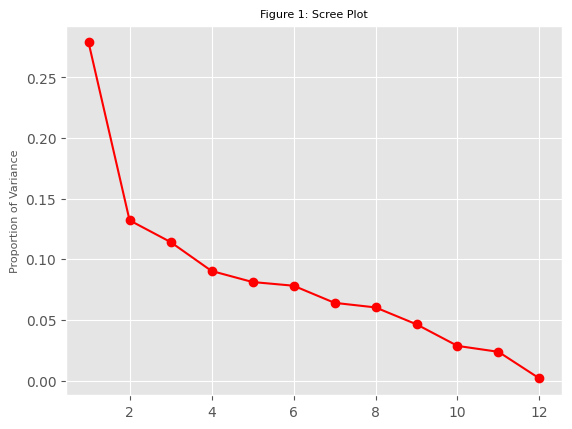

In [20]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [22]:
pca = PCA(n_components=3)
PC = pca.fit_transform(Wines_scaled)

In [52]:

pca = PCA(n_components=4)
PC = pca.fit_transform(Wines_scaled)
pca_wines = pd.DataFrame(data = PC, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
finalDf = pd.concat([pca_wines, df[['quality']]], axis = 1)
Xfinal = finalDf[['pc1','pc2','pc3', 'pc4']]
yfinal = finalDf['quality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size=0.3)
logistic = LogisticRegression()
logistic.fit(X = X_train, y = y_train)
logistic.predict(X_test)
score_4 = logistic.score(X_test, y_test)

pca = PCA(n_components=5)
PC = pca.fit_transform(Wines_scaled)
pca_wines = pd.DataFrame(data = PC, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
finalDf = pd.concat([pca_wines, df[['quality']]], axis = 1)
Xfinal = finalDf[['pc1','pc2','pc3', 'pc4', 'pc5']]
yfinal = finalDf['quality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size=0.3)
logistic = LogisticRegression()
logistic.fit(X = X_train, y = y_train)
logistic.predict(X_test)
score_5 = logistic.score(X_test, y_test)

pca = PCA(n_components=6)
PC = pca.fit_transform(Wines_scaled)
pca_wines = pd.DataFrame(data = PC, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
finalDf = pd.concat([pca_wines, df[['quality']]], axis = 1)
Xfinal = finalDf[['pc1','pc2','pc3', 'pc4', 'pc5', 'pc6']]
yfinal = finalDf['quality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size=0.3)
logistic = LogisticRegression()
logistic.fit(X = X_train, y = y_train)
logistic.predict(X_test)
score_6 = logistic.score(X_test, y_test)

pca = PCA(n_components=7)
PC = pca.fit_transform(Wines_scaled)
pca_wines = pd.DataFrame(data = PC, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7'])
finalDf = pd.concat([pca_wines, df[['quality']]], axis = 1)
Xfinal = finalDf[['pc1','pc2','pc3', 'pc4', 'pc5', 'pc6', 'pc7']]
yfinal = finalDf['quality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size=0.3)
logistic = LogisticRegression()
logistic.fit(X = X_train, y = y_train)
logistic.predict(X_test)
score_7 = logistic.score(X_test, y_test)

pca = PCA(n_components=6)
PC = pca.fit_transform(Wines_scaled)
pca_wines = pd.DataFrame(data = PC, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
finalDf = pd.concat([pca_wines, df[['quality']]], axis = 1)
Xfinal = finalDf[['pc1','pc2','pc3', 'pc4', 'pc5', 'pc6']]
yfinal = finalDf['quality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size=0.3)
logistic = LogisticRegression()
logistic.fit(X = X_train, y = y_train)
logistic.predict(X_test)
score_6 = logistic.score(X_test, y_test)

pca = PCA(n_components=7)
PC = pca.fit_transform(Wines_scaled)
pca_wines = pd.DataFrame(data = PC, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7'])
finalDf = pd.concat([pca_wines, df[['quality']]], axis = 1)
Xfinal = finalDf[['pc1','pc2','pc3', 'pc4', 'pc5', 'pc6', 'pc7']]
yfinal = finalDf['quality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size=0.3)
logistic = LogisticRegression()
logistic.fit(X = X_train, y = y_train)
logistic.predict(X_test)
score_7 = logistic.score(X_test, y_test)

pca = PCA(n_components=8)
PC = pca.fit_transform(Wines_scaled)
pca_wines = pd.DataFrame(data = PC, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])
finalDf = pd.concat([pca_wines, df[['quality']]], axis = 1)
Xfinal = finalDf[['pc1','pc2','pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8']]
yfinal = finalDf['quality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size=0.3)
logistic = LogisticRegression()
logistic.fit(X = X_train, y = y_train)
logistic.predict(X_test)
score_8 = logistic.score(X_test, y_test)

pca = PCA(n_components=9)
PC = pca.fit_transform(Wines_scaled)
pca_wines = pd.DataFrame(data = PC, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])
finalDf = pd.concat([pca_wines, df[['quality']]], axis = 1)
Xfinal = finalDf[['pc1','pc2','pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9']]
yfinal = finalDf['quality']
X_train, X_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size=0.3)
logistic = LogisticRegression()
logistic.fit(X = X_train, y = y_train)
logistic.predict(X_test)
score_9 = logistic.score(X_test, y_test)

#finalDf.head(6)
#finalDf.sample(5)

In [53]:
scores=[score_4, score_5, score_6, score_7, score_8, score_9]
ex.bar(y = scores, x = ('pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'),range_y = (0.7, 0.9), title = 'PC prediction accuracy')


In [ ]:
target = df["quality"]
features = df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]

In [ ]:
classifier = LogisticRegression()
classifier.fit(features,target)

LogisticRegression()

In [ ]:
#Higher the score, better the model.
classifier.score(features,target)

0.4608003266639445

In [ ]:
classifier.predict([[6.6,0.17,0.38,1.5,0.032,28,112,0.9914,3.25,0.55,11.4]])

array([6])